In [32]:
import pandas as pd

df = pd.read_csv("final_new.csv")

print(df.columns)

Index(['date', 'weather_code', 'temperature_2m_mean', 'temperature_2m_max',
       'temperature_2m_min', 'wind_speed_10m_max', 'wind_gusts_10m_max',
       'wind_direction_10m_dominant', 'shortwave_radiation_sum',
       'et0_fao_evapotranspiration', 'weather_status'],
      dtype='object')


In [33]:
# Create next day weather code feature by location
df['next_day_weather_status'] = df['weather_status'].shift(-1)


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

# Drop rows with NaN values in critical columns
df_clean = df.dropna(subset=['next_day_weather_status'])  # تأكد أن critical columns ما فيهم NaNs
# # Convert date to datetime if it's not already
# df_clean['date'] = pd.to_datetime(df_clean['date'])

# # Extract time-based features
# df_clean['year'] = df_clean['date'].dt.year
# df_clean['month'] = df_clean['date'].dt.month
# df_clean['day'] = df_clean['date'].dt.day
# df_clean['dayofweek'] = df_clean['date'].dt.dayofweek

# One-hot encode location
# df_clean = pd.get_dummies(df_clean, columns=['location'])

# print(df_clean.head())
# Define features and target
X = df_clean.drop(['next_day_weather_status', 'date',"weather_code","weather_status"], axis=1)
y = df_clean['next_day_weather_status']


# Use LabelEncoder to transform weather codes to consecutive integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print original classes and their encoded values
# print("Original weather codes and their encoded values:")
# for i, orig_class in enumerate(label_encoder.classes_):
#     print(f"Original: {orig_class} -> Encoded: {i}")
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Split data using encoded labels
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Train XGBoost classifier
model = xgb.XGBClassifier(
                          )
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions back to original weather codes for interpretation
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

# # Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.4f}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=[str(c) for c in label_encoder.classes_]))

# Print a sample of predictions (original weather codes)
print("\nSample predictions (original weather codes):")
sample_indices = range(min(10, len(y_test)))
for i in sample_indices:
    print(f"True: {y_test_original[i]}, Predicted: {y_pred_original[i]}")
# Feature importance analysis
print(classification_report(y_test, y_pred))

# Feature importance
importance = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nTop 10 Important Features:")
print(feature_importance.head(10))



['Clear sky' 'Drizzle' 'Overcast' 'Rain']
Accuracy: 67.8585

Sample predictions (original weather codes):
True: Clear sky, Predicted: Clear sky
True: Rain, Predicted: Rain
True: Overcast, Predicted: Overcast
True: Rain, Predicted: Rain
True: Clear sky, Predicted: Clear sky
True: Overcast, Predicted: Overcast
True: Drizzle, Predicted: Drizzle
True: Clear sky, Predicted: Clear sky
True: Rain, Predicted: Rain
True: Rain, Predicted: Rain
              precision    recall  f1-score   support

           0       0.76      0.82      0.78     13749
           1       0.56      0.55      0.56     13644
           2       0.66      0.58      0.62     13598
           3       0.73      0.76      0.74     13826

    accuracy                           0.68     54817
   macro avg       0.68      0.68      0.68     54817
weighted avg       0.68      0.68      0.68     54817


Top 10 Important Features:
                       Feature  Importance
7   et0_fao_evapotranspiration    0.284575
2           t

In [37]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier  # استيراد RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

# Drop rows with NaN values in critical columns
df_clean = df.dropna(subset=['next_day_weather_status'])  # تأكد أن critical columns ما فيهم NaNs

# Define features and target
X = df_clean.drop(['next_day_weather_status', 'date', 'weather_code', 'weather_status'], axis=1)
y = df_clean['next_day_weather_status']

# Use LabelEncoder to transform weather codes to consecutive integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Split data using encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)  # تغيير إلى RandomForest
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions back to original weather codes for interpretation
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in label_encoder.classes_]))

# Print a sample of predictions (original weather codes)
print("\nSample predictions (original weather codes):")
sample_indices = range(min(10, len(y_test)))
for i in sample_indices:
    print(f"True: {y_test_original[i]}, Predicted: {y_pred_original[i]}")

# Feature importance analysis
print(classification_report(y_test, y_pred))

# Feature importance
importance = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nTop 10 Important Features:")
print(feature_importance.head(10))


Accuracy: 62.8708

Classification Report:
              precision    recall  f1-score   support

   Clear sky       0.68      0.64      0.65      6391
     Drizzle       0.56      0.37      0.45      8326
    Overcast       0.63      0.78      0.70     13634
        Rain       0.65      0.63      0.64      5493

    accuracy                           0.63     33844
   macro avg       0.63      0.60      0.61     33844
weighted avg       0.62      0.63      0.62     33844


Sample predictions (original weather codes):
True: Rain, Predicted: Rain
True: Drizzle, Predicted: Overcast
True: Clear sky, Predicted: Overcast
True: Drizzle, Predicted: Overcast
True: Rain, Predicted: Drizzle
True: Drizzle, Predicted: Overcast
True: Drizzle, Predicted: Clear sky
True: Overcast, Predicted: Overcast
True: Clear sky, Predicted: Clear sky
True: Overcast, Predicted: Overcast
              precision    recall  f1-score   support

           0       0.68      0.64      0.65      6391
           1       0.

Original Columns: Index(['date', 'weather_code', 'temperature_2m_mean', 'temperature_2m_max',
       'temperature_2m_min', 'wind_speed_10m_max', 'wind_gusts_10m_max',
       'wind_direction_10m_dominant', 'shortwave_radiation_sum',
       'et0_fao_evapotranspiration', 'weather_status'],
      dtype='object')
Original shape: (169220, 11)

Adding Time-Based Features...
Adding Lagged Features (Lag 1)...
Adding Derived Features...
Shape before dropping NaNs from shifts: (169220, 29)
Shape after dropping NaNs from shifts: (169218, 29)

Features used for prediction: ['weather_code', 'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos', 'weather_code_lag1', 'temperature_2m_mean_lag1', 'temperature_2m_max_lag1', 'temperature_2m_min_lag1', 'wind_speed_10m_max_lag1', 'wind_gusts_10m_max_lag1', 

d:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:27:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Making predictions...

Accuracy: 74.2283%

Classification Report:
              precision    recall  f1-score   support

   Clear sky       0.86      0.83      0.85     13704
     Drizzle       0.63      0.58      0.60     13704
    Overcast       0.71      0.77      0.74     13704
        Rain       0.76      0.79      0.77     13704

    accuracy                           0.74     54816
   macro avg       0.74      0.74      0.74     54816
weighted avg       0.74      0.74      0.74     54816


Sample predictions (original weather codes):
Index 272886 -> True: Rain, Predicted: Drizzle
Index 194470 -> True: Clear sky, Predicted: Clear sky
Index 133280 -> True: Overcast, Predicted: Overcast
Index 62828 -> True: Clear sky, Predicted: Clear sky
Index 246025 -> True: Rain, Predicted: Rain
Index 88310 -> True: Rain, Predicted: Drizzle
Index 7836 -> True: Overcast, Predicted: Overcast
Index 135532 -> True: Overcast, Predicted: Overcast
Index 206233 -> True: Drizzle, Predicted: Rain
Index 17

C:\Users\PC\AppData\Local\Temp\ipykernel_20840\2862357846.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(num_features_to_plot), palette='viridis')


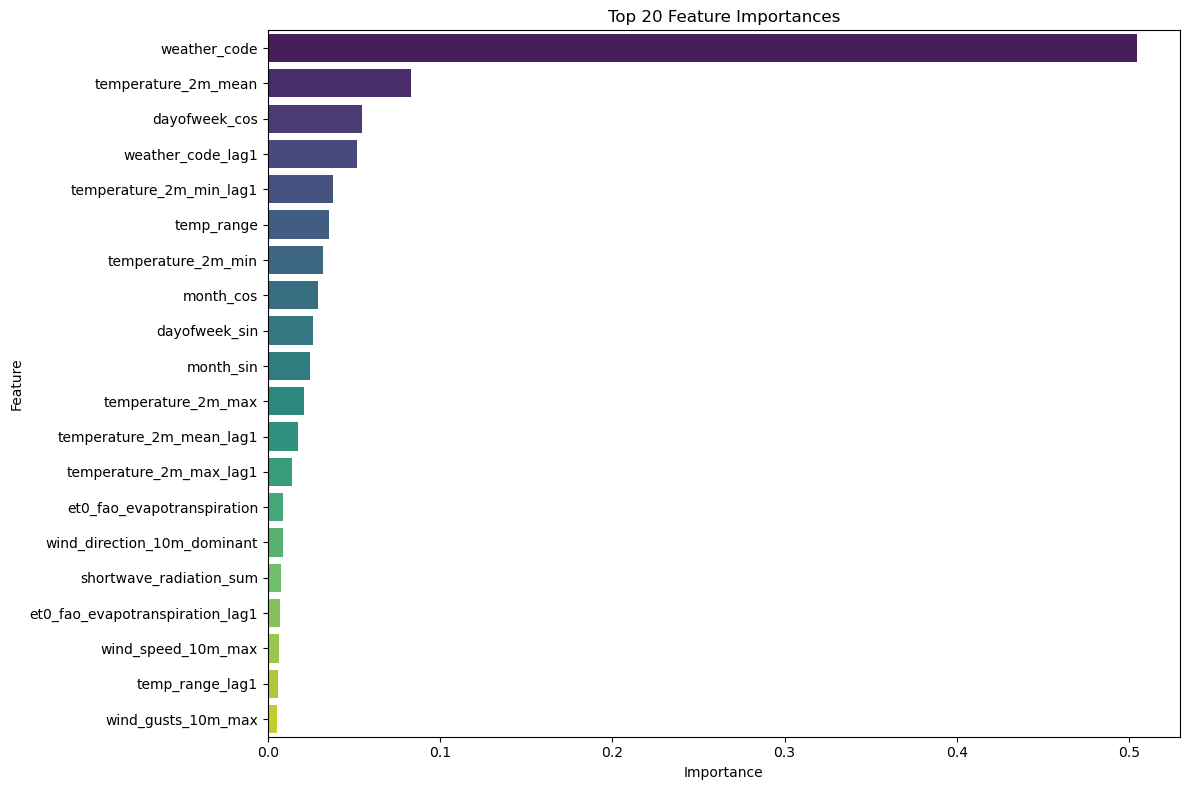

Plotting Confusion Matrix...


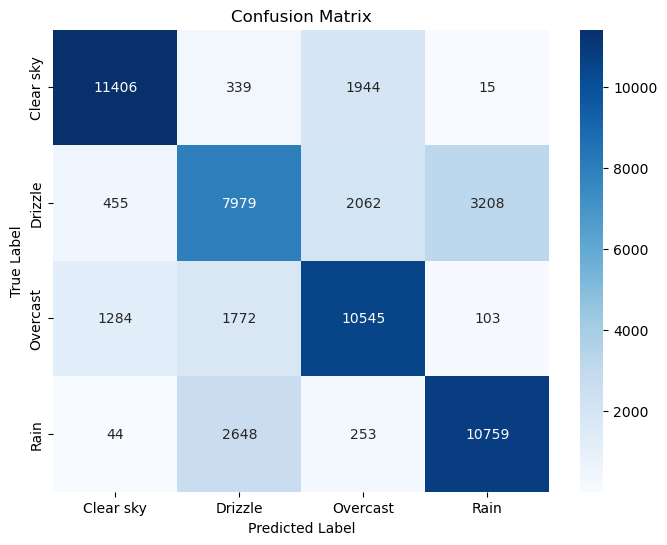


--- Script Finished ---


In [50]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("final_new.csv")
print("Original Columns:", df.columns)
print(f"Original shape: {df.shape}")

# --- Target Variable Creation ---
# Create the target variable: next day's weather status
df['next_day_weather_status'] = df['weather_status'].shift(-1)

# --- Feature Engineering ---

# 1. Time-Based Features
print("\nAdding Time-Based Features...")
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

# Cyclical encoding for month and dayofweek
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek']/7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek']/7)

# 2. Lagged Features (Previous Day's Weather)
print("Adding Lagged Features (Lag 1)...")
features_to_lag = [
    'weather_code', 'temperature_2m_mean', 'temperature_2m_max',
    'temperature_2m_min', 'wind_speed_10m_max', 'wind_gusts_10m_max',
    'wind_direction_10m_dominant', 'shortwave_radiation_sum',
    'et0_fao_evapotranspiration'
    # Don't lag 'weather_status' directly if using 'weather_code'
]

for col in features_to_lag:
    df[f'{col}_lag1'] = df[col].shift(1)

# 3. Derived Features
print("Adding Derived Features...")
df['temp_range'] = df['temperature_2m_max'] - df['temperature_2m_min']
# Also create lagged temperature range
df['temp_range_lag1'] = df['temp_range'].shift(1)


# --- Data Cleaning and Preparation ---

# Drop rows with NaNs introduced by shifting (for target AND lagged features)
# This will remove the first row (due to lagged features) and the last row (due to target shift)
print(f"Shape before dropping NaNs from shifts: {df.shape}")
df_clean = df.dropna()
print(f"Shape after dropping NaNs from shifts: {df_clean.shape}")


# --- Define Features (X) and Target (y) ---
# Columns to drop:
# - Original date/time columns used for feature engineering ('date', 'month', 'dayofweek')
# - Original target source ('weather_status')
# - The target variable itself ('next_day_weather_status')
columns_to_drop = [
    'date', 'month', 'dayofweek',              # Original time cols
    'weather_status',                         # Original target source
    'next_day_weather_status'                 # Target variable
]

X = df_clean.drop(columns=columns_to_drop)
y = df_clean['next_day_weather_status']

print("\nFeatures used for prediction:", X.columns.tolist())
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

# Check for any remaining NaNs in features (shouldn't be any after dropna)
if X.isnull().sum().sum() > 0:
    print("\nWarning: NaNs found in features after cleaning!")
    print(X.isnull().sum())
else:
    print("\nNo NaNs found in the final feature set (X).")

# --- Target Encoding ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_
print("\nWeather Classes:", class_names)
print("Encoded mapping:", {name: i for i, name in enumerate(class_names)})


# --- Handle Class Imbalance using SMOTE ---
print("\nClass distribution before SMOTE:")
print(y.value_counts(normalize=True)) # Show percentages

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

print("\nClass distribution after SMOTE:")
# y_resampled is numpy array, convert to Series for value_counts
print(pd.Series(y_resampled).value_counts(normalize=True))


# --- Train-Test Split ---
# Stratify ensures distribution is similar in train/test, important after SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")

# --- Model Training ---
print("\nTraining XGBoost model...")
# Consider using GPU if available and dataset is large: tree_method='gpu_hist'
model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False, # Recommended practice
    eval_metric='mlogloss'     # Suitable for multi-class classification
)
model.fit(X_train, y_train)

# --- Hyperparameter Tuning (Optional Placeholder) ---
# If you want to tune, you'd replace the model fitting above with GridSearchCV
# print("\nStarting GridSearchCV for hyperparameter tuning...")
# Define param_grid...
# grid_search = GridSearchCV(...)
# grid_search.fit(X_train, y_train)
# model = grid_search.best_estimator_
# print(f"Best parameters found: {grid_search.best_params_}")


# --- Predictions ---
print("Making predictions...")
y_pred = model.predict(X_test)

# Convert predictions and test labels back for interpretation
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)


# --- Evaluation ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy*100:.4f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Print a sample of predictions
print("\nSample predictions (original weather codes):")
sample_indices = np.random.choice(len(y_test), min(10, len(y_test)), replace=False) # Random sample
for i in sample_indices:
    print(f"Index {X_test.index[i]} -> True: {y_test_original[i]}, Predicted: {y_pred_original[i]}")

# --- Feature Importance ---
print("\nCalculating and plotting Feature Importances...")
importance = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importances (Top 20):")
print(feature_importance.head(20))

# Plot feature importances
plt.figure(figsize=(12, 8)) # Adjusted size for potentially more features
# Plot more features if available, e.g., top 20
num_features_to_plot = min(20, len(feature_importance))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(num_features_to_plot), palette='viridis')
plt.title(f'Top {num_features_to_plot} Feature Importances')
plt.tight_layout()
plt.show()

# --- Confusion Matrix ---
print("Plotting Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\n--- Script Finished ---")